# Redes Profundas e Meta-heurísticas


In [1]:
#Importando bibliotecas

import numpy as np
import pandas as pd
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models,optimizers
from sklearn.preprocessing import MinMaxScaler

# Conjunto de dados 

https://www.kaggle.com/code/mpwolke/iot-device-network-logs/comments e pré-processado para sistema de detecção de intrusão baseado em rede em dispositivos IoT. Sensor ultrassônico com Arduino e NodeMCU usado para monitorar a rede e coletar os logs da rede. NodeMCU com módulo wifi ESP8266 foi usado para enviar dados para o servidor via wifi.

Este conjunto de dados é pré-processado de acordo com o sistema de detecção de intrusão baseado em rede em dispositivos IoT. Os dados usados abaixo sofreram uma modifição, o dataset original continha as seguintes assinatura de dados:

0- Normal 1- Configuração errada 2- Ddos​​3- Sondagem de tipo de dados (sensor ultrassônico foi usado, então na sondagem de tipo de dados a maioria dos valores de string são enviados para o servidor) 4 - Ataque de varredura 5 - Homem no meio

In [2]:
df = pd.read_csv('Preprocessed_data.csv')
df

,frame.number,frame.time,frame.len,eth.src,eth.dst,ip.src,ip.dst,ip.proto,ip.len,tcp.len,tcp.srcport,tcp.dstport,Value,normality
0,1,123722736684743,54,87971959760497,167275820076079,192168035,1921680121,6.0,40.0,0.0,49279.0,80.0,-99.0,0
1,2,123722736773147,62,87971959760497,167275820076079,192168035,1921680121,6.0,48.0,0.0,56521.0,80.0,-99.0,0
2,3,123722736824792,62,167275820076079,87971959760497,1921680121,192168035,6.0,48.0,0.0,80.0,56521.0,-99.0,0
3,4,123722736836228,54,167275820076079,87971959760497,1921680121,192168035,6.0,40.0,0.0,80.0,49279.0,-99.0,0
4,5,123722749684991,54,87971959760497,167275820076079,192168035,1921680121,6.0,40.0,0.0,56521.0,80.0,-99.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477421,87181,128413885087438,42,167275820076079,87971959760497,0,0,-1.0,0.0,0.0,0.0,0.0,-5.0,5
477422,69378,127166820599383,42,167275820076079,87971959760497,0,0,-1.0,0.0,0.0,0.0,0.0,-5.0,5
477423,81928,126800153119873,42,167275820076079,87971959760497,0,0,-1.0,0.0,0.0,0.0,0.0,-5.0,5
477424,37052,124902446969093,42,167275820076079,87971959760497,0,0,-1.0,0.0,0.0,0.0,0.0,-5.0,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477426 entries, 0 to 477425
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   frame.number  477426 non-null  int64  
 1   frame.time    477426 non-null  int64  
 2   frame.len     477426 non-null  int64  
 3   eth.src       477426 non-null  int64  
 4   eth.dst       477426 non-null  int64  
 5   ip.src        477426 non-null  int64  
 6   ip.dst        477426 non-null  int64  
 7   ip.proto      477426 non-null  float64
 8   ip.len        477426 non-null  float64
 9   tcp.len       477426 non-null  float64
 10  tcp.srcport   477426 non-null  float64
 11  tcp.dstport   477426 non-null  float64
 12  Value         477426 non-null  float64
 13  normality     477426 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 51.0 MB


In [4]:
data = df.values #Conversão para array

#Divisão em X e Y

X = data[:,0:13]
Y = data[:,13]

In [5]:
#Divide os dados em trein e test

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, train_size=0.8)

In [6]:
#Normalizando X e Y

scaler = MinMaxScaler()
XtrainS = scaler.fit_transform(Xtrain)
XtestS = scaler.transform(Xtest)

In [7]:
#Definição do tamanho para a camada de entrada

tamanho=Xtrain.shape
tamanho

(381940, 13)

In [8]:
#Cria as classes para o modelo multiclasses

Ytrain_onehot = keras.utils.to_categorical(Ytrain, num_classes = 6)
Ytest_onehot = keras.utils.to_categorical(Ytest, num_classes = 6)

# imprime os 5 primeiros valores para exemplificar

print("### Antes ###")
print(Ytrain[:5])
print(Ytest[:5])

print("\n### Depois ###")
print(Ytrain_onehot[:5])
print(Ytest_onehot[:5])

### Antes ###
[2. 1. 0. 0. 2.]
[2. 4. 0. 0. 3.]

### Depois ###
[[0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [9]:
#Criando o modelo sequencial e suas respectivas camadas ocultas, a função ultilizada na camada de 
#ativação foi a Softmax por se tratar de uma classificação multicategórica e nas demais a relu tanh.

model=models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_dim=tamanho[1]))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 6)                 102       
                                                                 
Total params: 870
Trainable params: 870
Non-trainable params: 0
_________________________________________________________________


In [10]:
#Loss definida como categorical_crossentropy por se tratar de uma classificação categórica 
#Acc será a acurária contabilizando a quantidade de acertos da classificação

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

Para obter as melhores métricas foram aplicados os métodos de normalização para os dados de entrada e one-hot encoding para formar a camada de saída, pois antes das alterações os resultados alcançados não ultrapassavam os 72% de acurácia.

In [11]:
#Treinamento do modelo

history = model.fit(XtrainS,Ytrain_onehot, epochs = 20,batch_size = 256, validation_data=(XtestS,Ytest_onehot))

Epoch 1/20
1492/1492 [==============================] - 3s 2ms/step - loss: 0.4165 - acc: 0.8505 - val_loss: 0.1243 - val_acc: 0.9650
Epoch 2/20
1492/1492 [==============================] - 2s 1ms/step - loss: 0.0912 - acc: 0.9831 - val_loss: 0.0668 - val_acc: 0.9912
Epoch 3/20
1492/1492 [==============================] - 2s 2ms/step - loss: 0.0516 - acc: 0.9916 - val_loss: 0.0423 - val_acc: 0.9926
Epoch 4/20
1492/1492 [==============================] - 2s 1ms/step - loss: 0.0357 - acc: 0.9925 - val_loss: 0.0315 - val_acc: 0.9928
Epoch 5/20
1492/1492 [==============================] - 2s 2ms/step - loss: 0.0295 - acc: 0.9936 - val_loss: 0.0285 - val_acc: 0.9944
Epoch 6/20
1492/1492 [==============================] - 2s 2ms/step - loss: 0.0263 - acc: 0.9947 - val_loss: 0.0252 - val_acc: 0.9952
Epoch 7/20
1492/1492 [==============================] - 2s 2ms/step - loss: 0.0245 - acc: 0.9950 - val_loss: 0.0249 - val_acc: 0.9956
Epoch 8/20
1492/1492 [==============================] - 3s 2ms

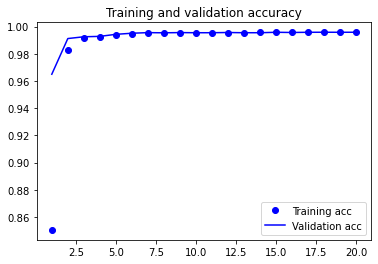

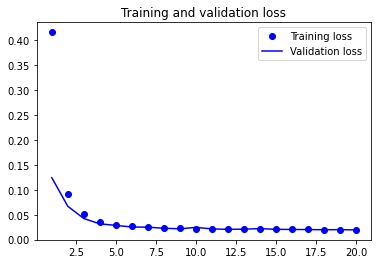

In [12]:
#Plotando resultado

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Conforme observado nos gráficos acima, constatamos que o dados se adequaram ao modelo tanto no treino quanto no teste, chegando a uma acurácia de 99,58% para treino e 99,59% para a validação. 